In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [1]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('../datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# SPLIT DF_MALE INTO x & Y
# x = INDEPENDENT VARIABLES
# Y = EPENDENT VARIABLES
y = df['Outcome'].copy()
x = df.drop('Outcome', axis="columns")

y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# # HANDLE ADTA IMBALANCE - INCREASE/DECREASE ROWS WITH CLASS VALUES(0/1) IF ONE IS LOWER IN NUMBER
# # FOR BETTER TRAINING

# from imblearn.over_sampling import SMOTE

# X_balanced, y_balanced = SMOTE().fit_resample(x, y)
# y_balanced.value_counts()

diabetes
0    91482
1    91482
Name: count, dtype: int64

In [5]:
# TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Scale x with a standard scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=x.columns)

In [6]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [10]:
# TRAIN THE MODEL WITH SVM

from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(C=100, gamma=0.001, kernel='rbf', random_state=42)  
model.fit(x_train, y_train)  


SVC(C=100, gamma=0.001, random_state=42)

In [9]:
# # HYPER PARAMETER TUNING

# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(x_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [11]:
# PREDICT RESULTS

y_pred = model.predict(X_test) 
# train_pred = model.predict(x_train)

pred = model.score(X_test, y_test)
print(f"Accuracy : {pred * 100}%")

Accuracy : 77.27272727272727%


Text(95.72222222222221, 0.5, 'Truth')

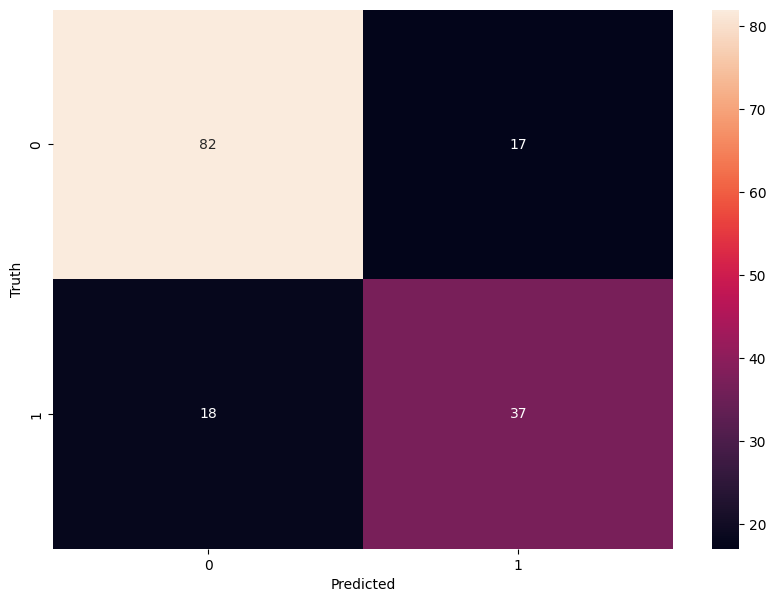

In [12]:
# CONFUSION MATRIX

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
# MANUAL CHECKING BY PUTTING ROW VALUES

row = 10
y_pred = model.predict(X_test.iloc[[row]])
res = y_pred[0]
print('prediction => ', res)
print('real => ', y_test.iloc[[row]])

prediction =>  0
real =>  667    1
Name: Outcome, dtype: int64


In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE

import pickle

# save the iris classification model as a pickle file
model_pkl_file = "diabetes-model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
pred = model.score(X_test, y_test)
print(f"Accuracy : {pred * 100}%")

Accuracy : 92.348263329052%
